In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
NORMAL = 0
PRIMED = 1

class Dice(object):
    @staticmethod
    def roll(p=[1./6] * 6):
        roll = np.random.multinomial(1, p)
        return np.argmax(roll) + 1

class Casino(object):

    def __init__(self, K, primed_table_dice_distribution):
        self.normal_tables = np.arange(K)
        self.primed_tables = np.arange(K, 2 * K)

        self.primed_table_dice_distribution = primed_table_dice_distribution
        self.tables = np.append(self.normal_tables, self.primed_tables)

    def is_table_primed(self, table):
        return table in self.primed_tables

    def get_next_table(self, player):
        p = 0.5
        if len(player.visited_tables) != 0:
            p = 1./4 if player.visited_tables[-1] == PRIMED else 3./4

        table_type = np.random.binomial(1, p)
        if table_type == NORMAL or len(self.primed_tables) == 0:
            return self.normal_tables[len(player.visited_tables)]
        else:
            return self.primed_tables[len(player.visited_tables)]

    def roll_table_dice(self, player):
        table = player.current_table
        is_primed = self.is_table_primed(table)
        p = [1/6.] * 6 if not is_primed else self.primed_table_dice_distribution
        return Dice.roll(p)

In [27]:
class Player(object):
    def __init__(self, casino, tables_to_visit, dice_distribution):
        self.visited_tables = []
        self.current_table = None
        self.rolls = []
        self.casino = casino
        self.go_to_next_table()
        self.nr_tables_to_visit = tables_to_visit
        self.dice_distribution = dice_distribution

    def go_to_next_table(self):
        table = self.casino.get_next_table(self)
        self.current_table = table
        self.visited_tables.append(table)

    def roll_player_dice(self):
        return np.random.multinomial(1, self.dice_distribution)

    def roll_dices(self):
        p_roll = Dice.roll(self.dice_distribution)
#         print "my roll (primed %s): %s" % (self.dice_distribution, str(p_roll))
        t_roll = self.casino.roll_table_dice(self)
#         print "table roll (primed %s): %s" % (self.casino.is_table_primed(self.current_table), str(t_roll))
        sum_roll = p_roll + t_roll
        self.rolls.append(sum_roll)

    def walk_casino(self):
        for _ in xrange(self.nr_tables_to_visit):
            self.roll_dices()
        return self.rolls

In [46]:
K = 10
N = 5000
c = Casino(K, primed_table_dice_distribution=[5./10] + 5 * [1./10])
players = []
player_dice_distribution = [1./7] * 5 + [2./7]
for _ in xrange(N):
    players.append(Player(c, tables_to_visit=K, dice_distribution=player_dice_distribution))

all_rolls = []
for n in xrange(N):
    rolls = players[n].walk_casino()
    all_rolls = all_rolls + rolls

# print "all: %s" % all_rolls

(2, 12)

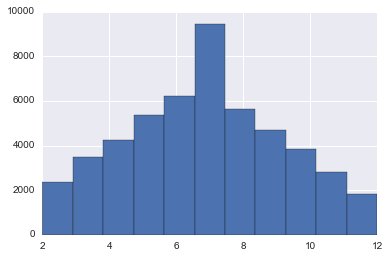

In [47]:
# h = np.histogram2d(np.arange(0, 12), all_rolls)
# print h
n, bins, patches = plt.hist(all_rolls, bins=11)
plt.xlim(2,12)